# Time Series Data Analysis Project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import os
import urllib.request

# download the data if not present
file_path = 'AirPassengers.csv'
if not os.path.exists(file_path):
	url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
	urllib.request.urlretrieve(url, file_path)

# read the data
df = pd.read_csv(file_path)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Data Pre-processing

In [3]:
# changes the names of columns
df.columns = ["Date", "Number of Passengers"]
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Date', ylabel='Number of Passengers'>

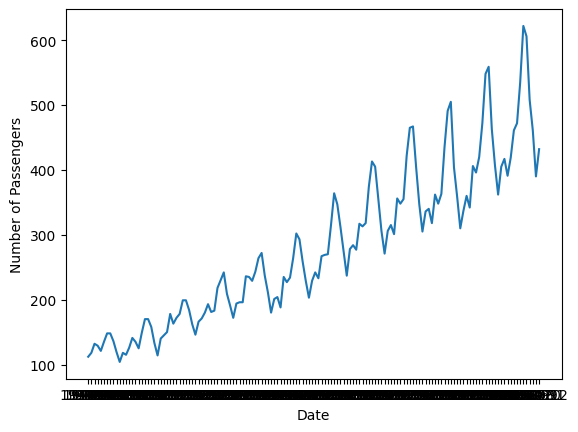

In [4]:
sns.lineplot(x="Date", y="Number of Passengers", data=df)

Note: you may need to restart the kernel to use updated packages.


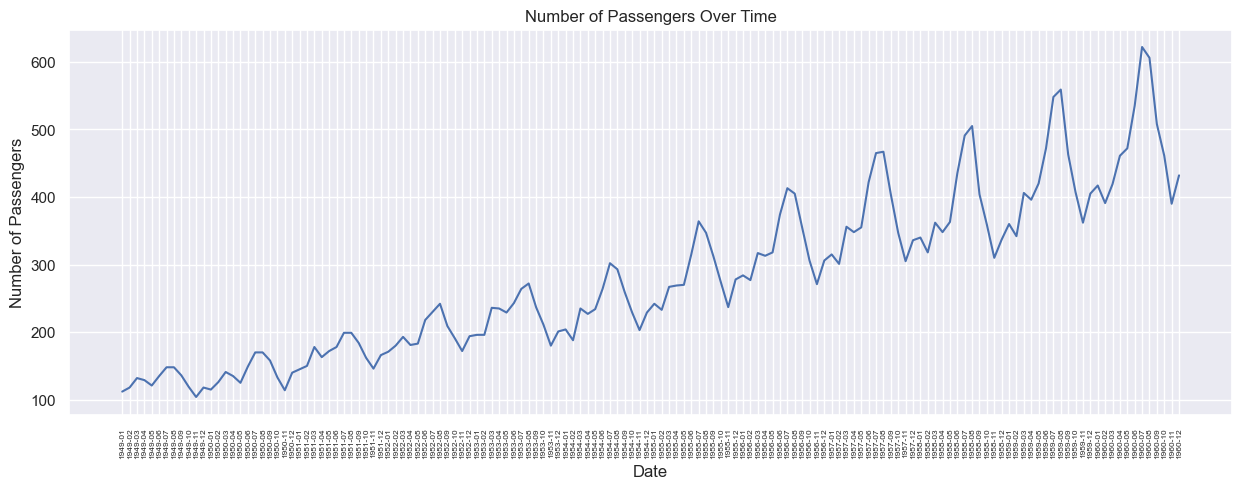

In [5]:
# plot the data using sns
sns.set(rc={'figure.figsize':(15, 5)}) # set the figure size
sns.lineplot(x = "Date", y = "Number of Passengers",  data = df)
# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")
#rotate x-axis ticks
plt.xticks(rotation=90, fontsize=6)

# make same plot using plotly
%pip install plotly
import plotly.express as px
fig = px.line(df, x="Date", y="Number of Passengers", title='Number of Passengers Over Time')
# change color of line
fig.update_traces(line_color='red')
fig.show() 

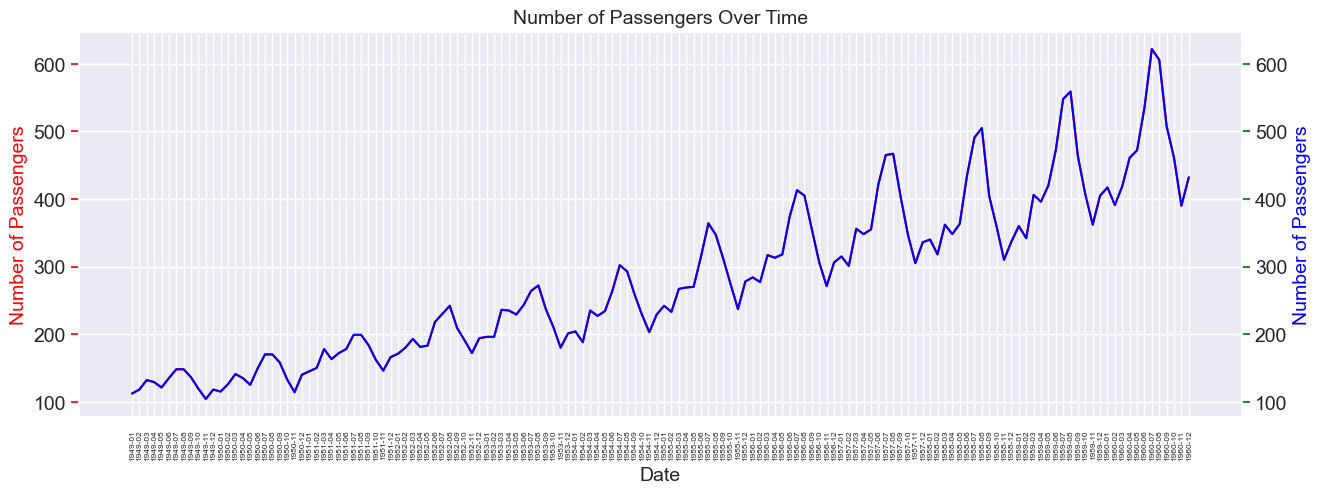

In [10]:
# make two sided plot using matplotlib
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Date"], df["Number of Passengers"], color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Passengers",color="red",fontsize=14)
ax.set_title("Number of Passengers Over Time",fontsize=14)
ax.tick_params(axis="y",color="red",labelsize=14)
ax.tick_params(axis="x",labelsize=6, rotation=90)
ax2=ax.twinx()
ax2.plot(df["Date"], df["Number of Passengers"],color="blue")
ax2.set_ylabel("Number of Passengers",color="blue",fontsize=14)
ax2.tick_params(axis="y",color="green",labelsize=14)
plt.show()

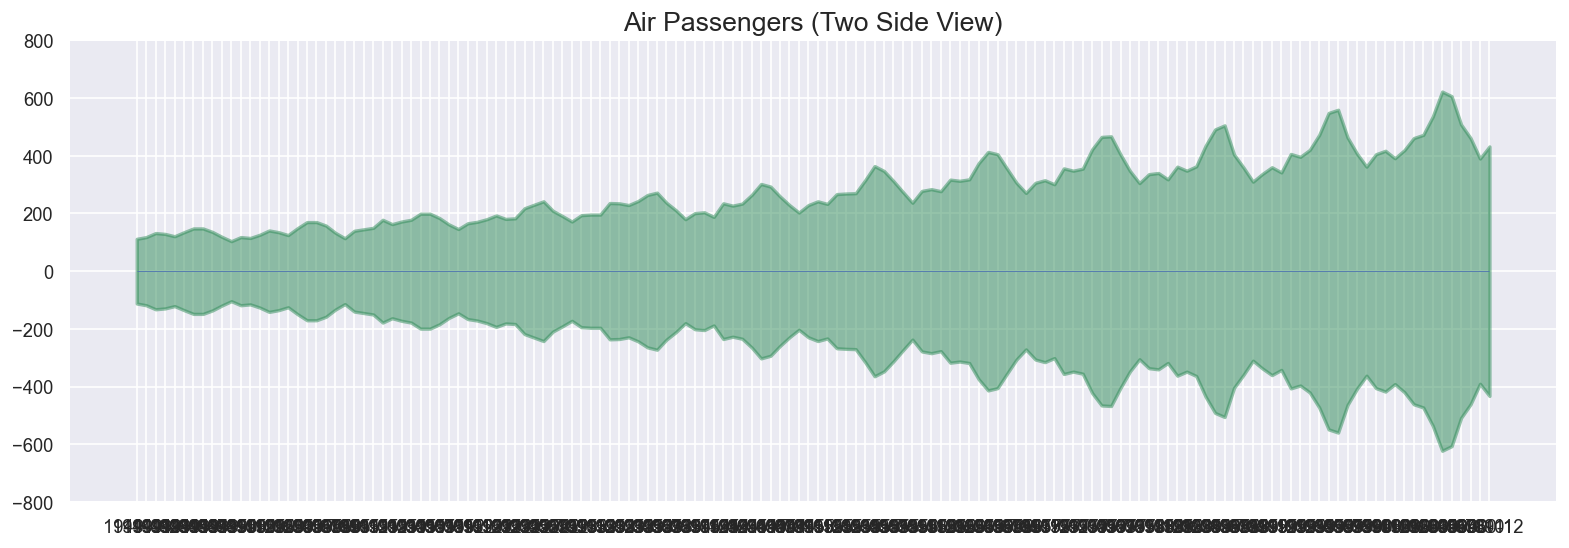

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

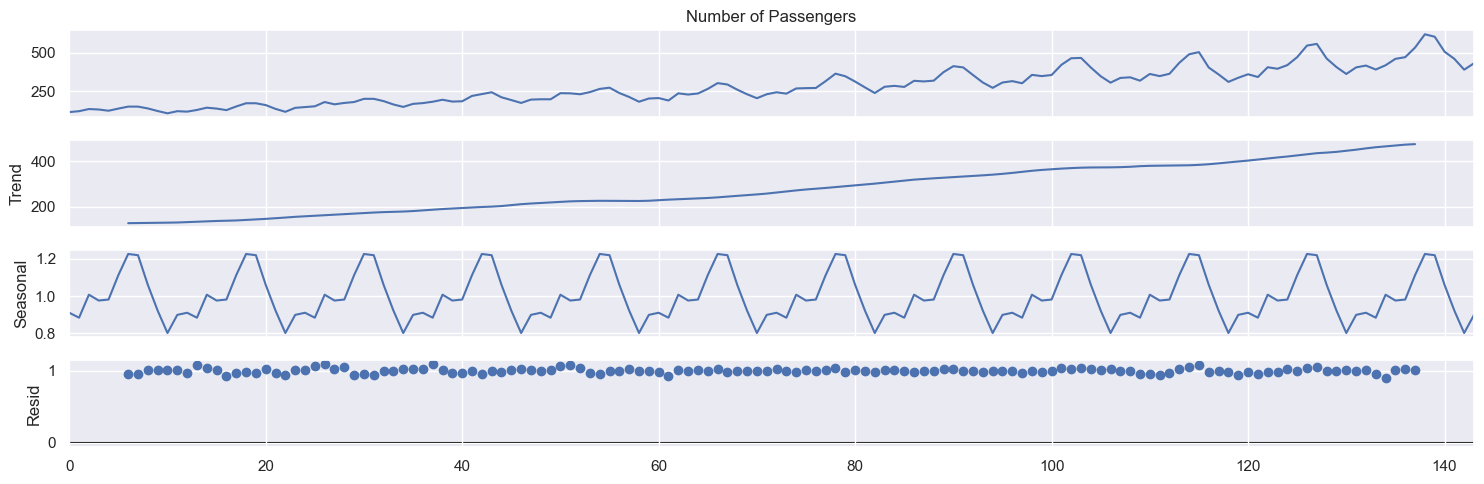

In [11]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()
# plot in plotly
fig = px.line(result.observed, x=result.observed.index, y=result.observed.values, title='Observed')
fig.show()

<Axes: >

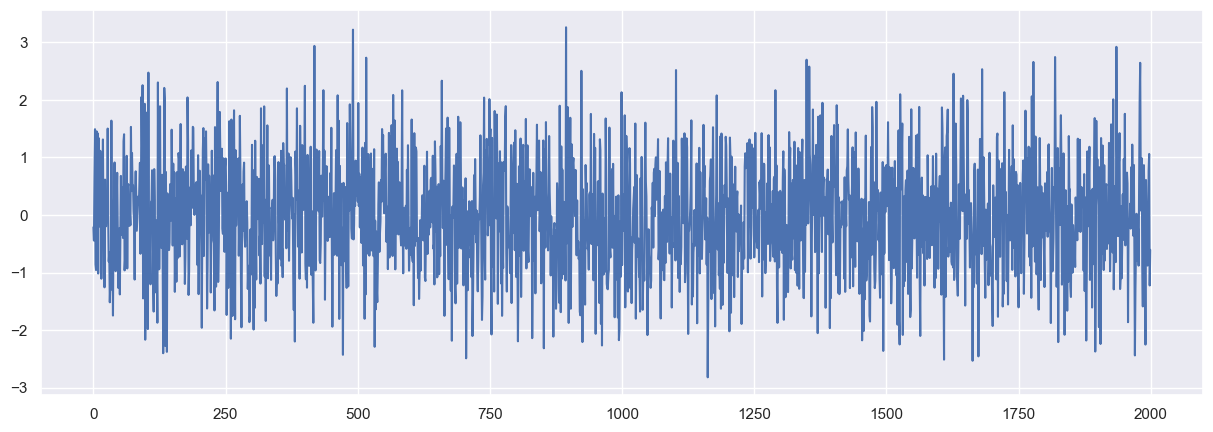

In [9]:
rand_numbs = np.random.randn(2000)
rand_numbs
pd.Series(rand_numbs).plot()
